# PROBLEM STATEMENT

- In this project, a regression model is developed to predict the probability of being accepted for Graduate school.


- The dataset contains the following parameters: 
    - GRE Scores ( out of 340 ) 
    - TOEFL Scores ( out of 120 ) 
    - University Rating ( out of 5 ) 
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    - Undergraduate GPA ( out of 10 ) 
    - Research Experience ( either 0 or 1 ) 
    - Chance of Admit ( ranging from 0 to 1 )

# STEP #0: IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

In [2]:
# Download dataset file "Admission.csv"

!wget = https://hr-projects-assets-prod.s3.amazonaws.com/dacpdq1205j/328e9b0c35b7e549946715ebf7ccb123/Admission.csv

--2021-09-10 06:33:38--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-09-10 06:33:38--  https://hr-projects-assets-prod.s3.amazonaws.com/dacpdq1205j/328e9b0c35b7e549946715ebf7ccb123/Admission.csv
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.101.4
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.101.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12905 (13K) [binary/octet-stream]
Saving to: ‘Admission.csv’

Admission.csv       100%[===================>]  12.60K  60.5KB/s    in 0.2s    

2021-09-10 06:33:39 (60.5 KB/s) - ‘Admission.csv’ saved [12905/12905]

FINISHED --2021-09-10 06:33:39--
Total wall clock time: 1.1s
Downloaded: 1 files, 13K in 0.2s (60.5 KB/s)


In [3]:
# Load data

admission_df = pd.read_csv("Admission.csv")

# STEP #2: VISUALIZE DATASET

In [6]:
# drop "Serial No." column.
admission_df = admission_df.drop(["Serial No."],axis = 1)

In [7]:
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admission Chance'],
      dtype='object')

In [25]:
# Plot all the column

column_headers = admission_df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admission Chance']]
# code

In [26]:
column_headers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


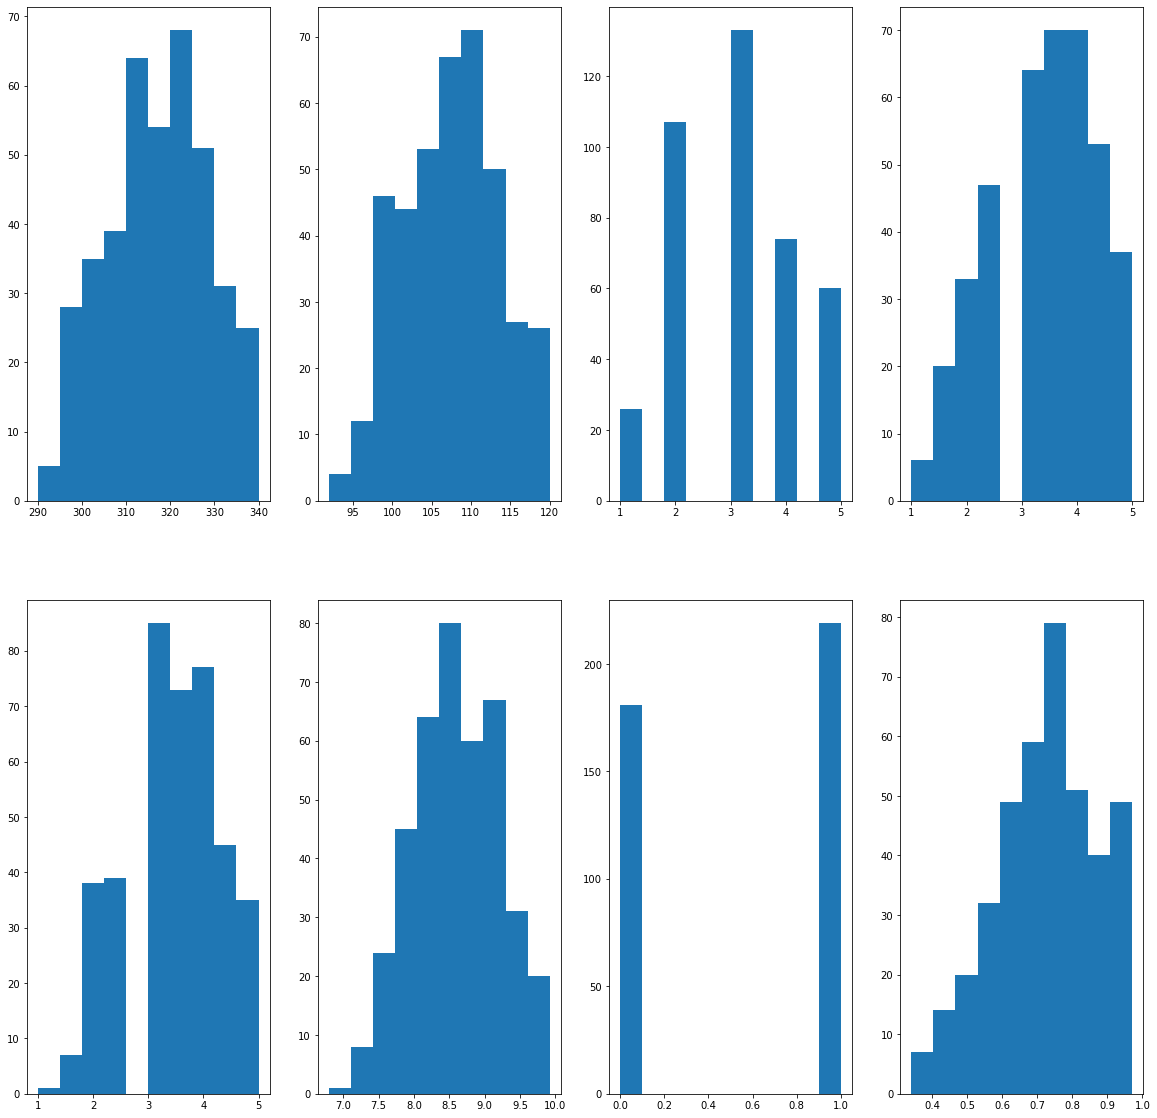

In [33]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(2,4,i)
    plt.hist(column_header,data=admission_df)
    ## Code
    i = i + 1


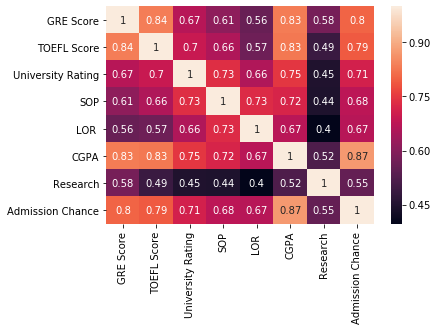

In [35]:
# Plot the correlation heatmap
sns.heatmap(admission_df.corr(),annot = True)

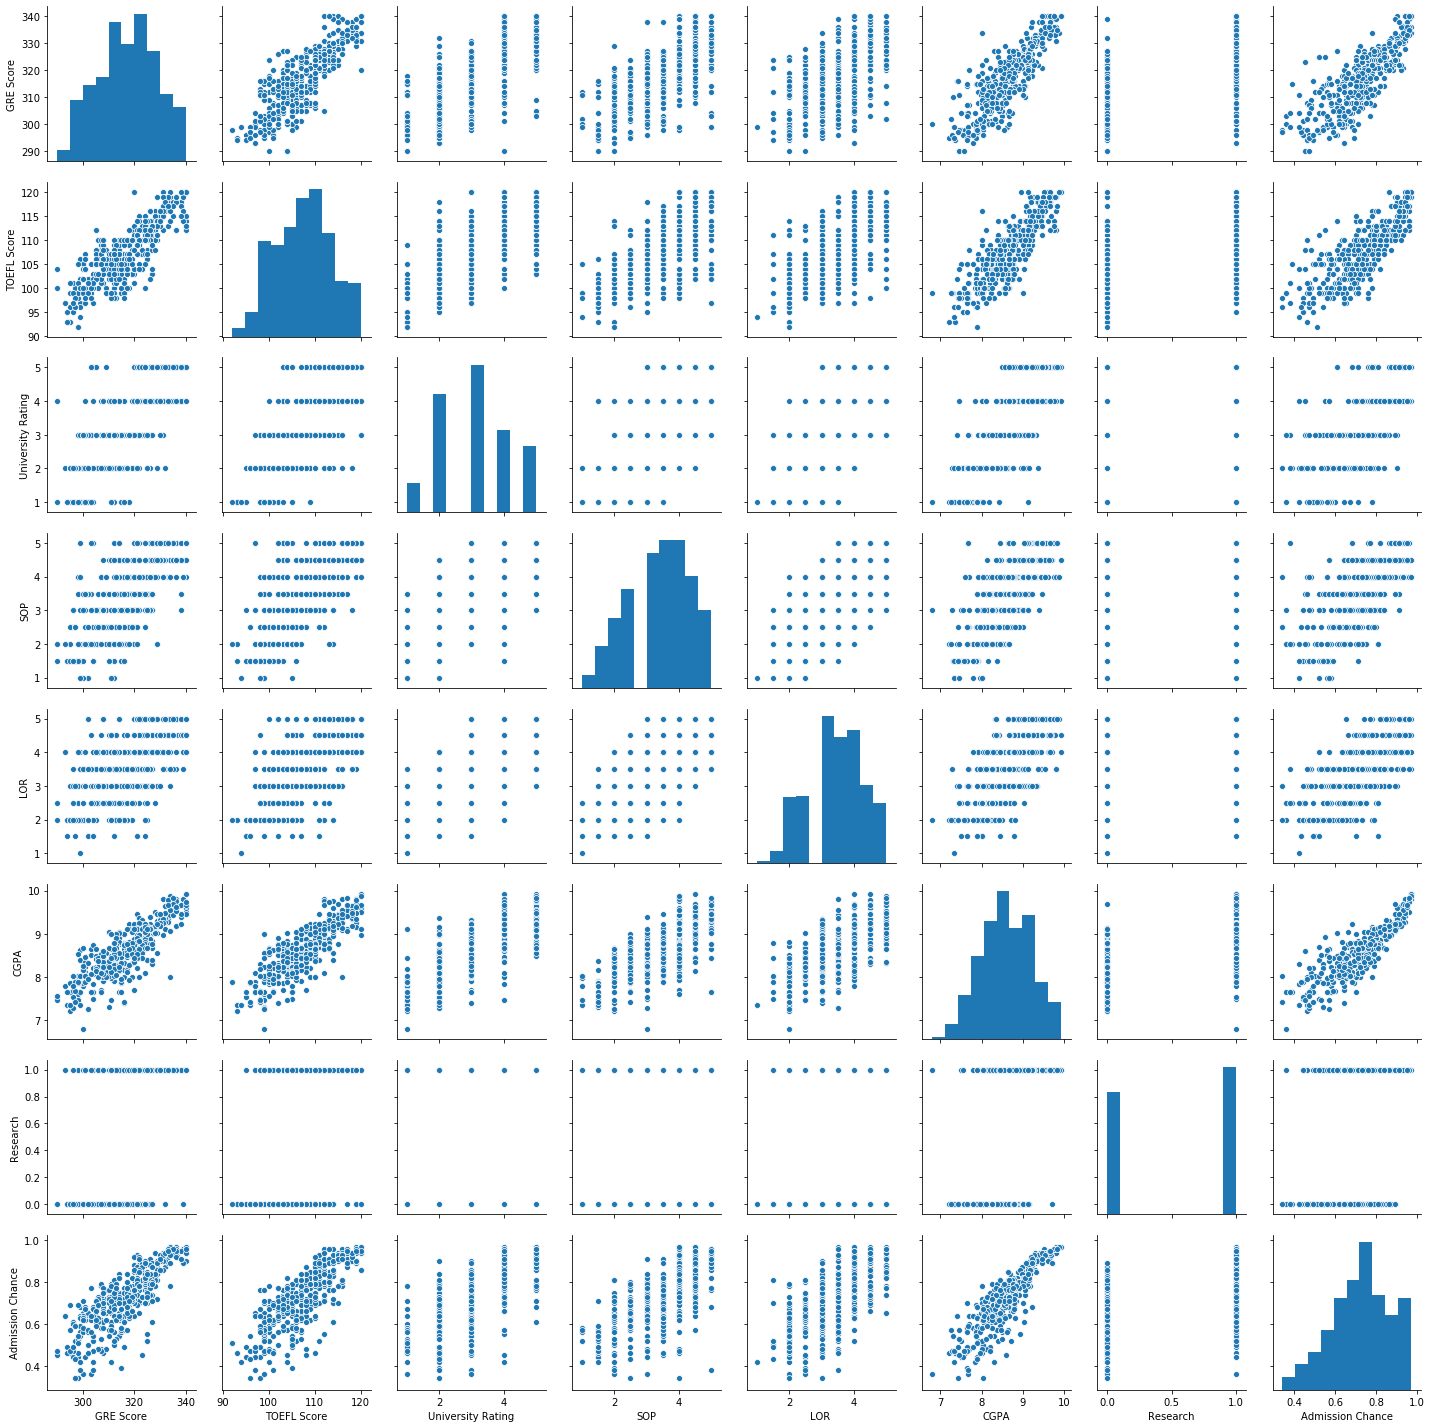

In [36]:
# Plot the pair Plot
sns.pairplot(admission_df)

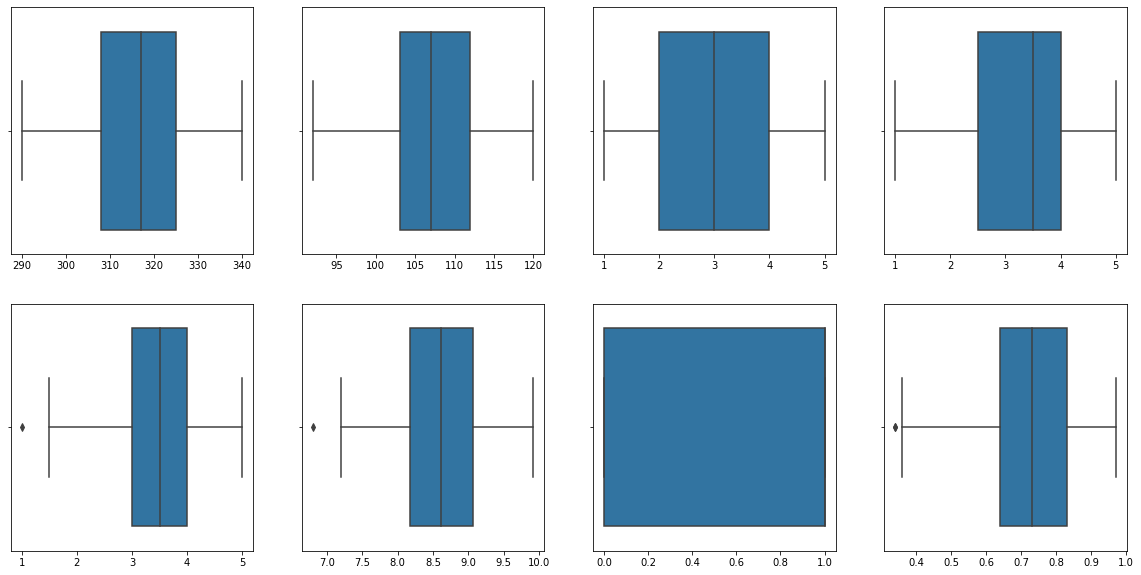

In [40]:
# Plot the Box Plot
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.boxplot([column_header],data=admission_df)
    ## Code
    i = i + 1


# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

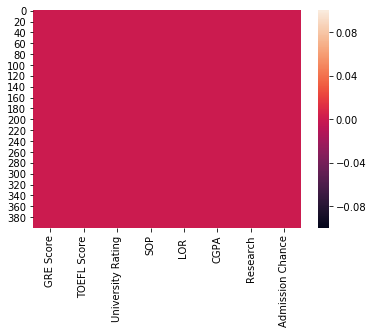

In [41]:
sns.heatmap(admission_df.isnull())

In [47]:
# Create independent variable
X = admission_df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

In [48]:
# Create dependent variable
y = admission_df["Admission Chance"]

In [49]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [51]:
# Split the data in Train : Test :: 80 : 20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

# STEP #4: TRAINING THE MODEL

In [52]:
## Create Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train,y_train)

# fit the data
## Code

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)

Linear Model Coeff (m) [ 0.00186251  0.00272369  0.00737745 -0.00029274  0.01577024  0.11466916
  0.02222705]
Linear Model Coeff (b) -1.2302337510969932


### Submit solution

In [86]:
# Run the cell to submit solution  
s1 = regressor.coef_ # assgin linear model coeff (m)
s2 = regressor.intercept_ # assgin linear model coeff (b)

file=open("submit0.txt","w+")

s1=str(s1)
file.write(s1)
file.write("\n")

s2=str(s2)
file.write(s2)
file.write("\n")
file.close()

# STEP #5: EVALUATING THE MODEL 

In [55]:
# Create for Prediction for Test data
y_predict = regressor.predict(X_test)

In [69]:
y_predict

array([0.65117446, 0.72368741, 0.93536809, 0.82164316, 0.58158673,
       0.92863016, 0.52682366, 0.54308993, 0.65940583, 0.83834924,
       0.72008833, 0.90749769, 0.55354476, 0.89008648, 0.70389539,
       0.68664473, 0.66657268, 0.48196096, 0.69057217, 0.97493132,
       0.58802433, 0.65286881, 0.71150098, 0.53528647, 0.94677007,
       0.80982947, 0.69459383, 0.56495613, 0.68192423, 0.81039878,
       0.80796481, 0.94640983, 0.64599494, 0.51104918, 0.65983663,
       0.66907811, 0.71572271, 0.64556878, 0.61540702, 0.87367833,
       0.74275261, 0.59782649, 0.77456683, 0.95944897, 0.85124125,
       0.83554825, 0.94662422, 0.64822919, 0.92247594, 0.85906183,
       0.89624998, 0.72869743, 0.78874783, 0.95142703, 0.57325803,
       0.58744723, 0.68621316, 0.84544646, 0.60495144, 0.84808919,
       0.66642894, 0.65524969, 0.70024808, 0.51206905, 0.62930376,
       0.7173701 , 0.62200838, 0.84170334, 0.85675802, 0.79886217,
       0.72196478, 0.81448203, 0.87373609, 0.83332085, 0.52554

In [71]:
y_test

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
       ... 
246    0.72
227    0.64
369    0.67
176    0.90
289    0.79
Name: Admission Chance, Length: 80, dtype: float64

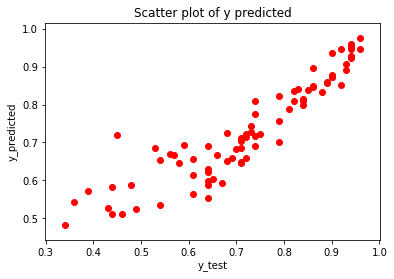

In [79]:
# Plot the scatter plot for y_predict

# Code
#plt.scatter(X_test, y_test, color ='gray')
plt.scatter(y_test, y_predict, color = "red")
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.title('Scatter plot of y predicted')
plt.show()

In [81]:
# Evalutate the model

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)


In [82]:
def mape(actual,pred):
    actual, pred = np.array(actual),np.array(pred)
    return np.mean(np.abs((actual-pred)/actual))*100

In [91]:
RMSE = round(np.sqrt(mean_squared_error(y_test,regressor.predict(X_test))),3)
MSE = mean_squared_error(y_test,regressor.predict(X_test))
MAE = mean_absolute_error(y_test,regressor.predict(X_test))
r2 = r2_score(y_test,regressor.predict(X_test))
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = mape(y_test,regressor.predict(X_test))

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 


RMSE = 0.068 
MSE = 0.004617003377285012 
MAE = 0.04795673362091196 
R2 = 0.8212082591486991 
Adjusted R2 = 0.803825728788156 
Mean Absolute Percentage Error = 8.511848732401695 %


### Submit solution

In [92]:
# Run the cell to submit solution
file=open("submit1.txt","w+")

RMSE=str(RMSE)
MSE=str(MSE)
MAE=str(MAE)
r2=str(r2)
adj_r2=str(adj_r2)
MAPE=str(MAPE)

file.write(RMSE)
file.write("\n")
file.write(MSE)
file.write("\n")
file.write(MAE)
file.write("\n")
file.write(r2)
file.write("\n")
file.write(adj_r2)
file.write("\n")
file.write(MAPE)
file.write("\n")
file.close()

# STEP #6 RETRAIN AND VISUALIZE THE RESULTS

In [93]:
# Retrain on "GRE Score" and "TOEFL Score" alone

X = admission_df[[ 'GRE Score', 'TOEFL Score' ]]
y = admission_df['Admission Chance']

In [94]:
# Split the data in Train : Test :: 80 : 20 and use random_state = 42

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [95]:
## Create Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train,y_train)

# Fit the model
##Code

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
# Create for Prediction for Test data
y_predict = regressor.predict(X_test)

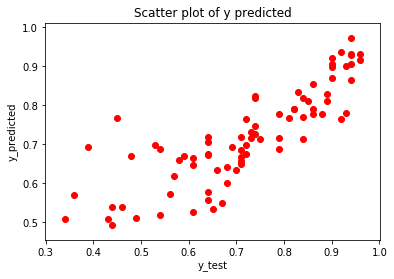

In [97]:
# Plot the scatter plot for y_predict
plt.scatter(y_test, y_predict, color = "red")
plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.title('Scatter plot of y predicted')
plt.show()

In [98]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = round(np.sqrt(mean_squared_error(y_test,regressor.predict(X_test))),3)
MSE = mean_squared_error(y_test,regressor.predict(X_test))
MAE = mean_absolute_error(y_test,regressor.predict(X_test))
r2 = r2_score(y_test,regressor.predict(X_test))
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = mape(y_test,regressor.predict(X_test))

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 



RMSE = 0.089 
MSE = 0.007871975759628138 
MAE = 0.06478157679937323 
R2 = 0.6951606626654036 
Adjusted R2 = 0.6872427577995699 
Mean Absolute Percentage Error = 10.96863953738907 %


### Submit solution

In [99]:
# Run the cell to submit solution

file=open("submit2.txt","w+")

RMSE=str(RMSE)
MSE=str(MSE)
MAE=str(MAE)
r2=str(r2)
adj_r2=str(adj_r2)
MAPE=str(MAPE)

file.write(RMSE)
file.write("\n")
file.write(MSE)
file.write("\n")
file.write(MAE)
file.write("\n")
file.write(r2)
file.write("\n")
file.write(adj_r2)
file.write("\n")
file.write(MAPE)
file.write("\n")
file.close()